# Changes in V2:
+ Add upsampling
+ Processing method of category_list change

# Import data

In [1]:
import pandas as pd

# acquisitions = pd.read_csv("./data/acquisitions.csv")
# acquisitions.head()

In [2]:
companies = pd.read_csv("./data/companies.csv")
companies.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [3]:
investments = pd.read_csv("./data/investments.csv")
investments.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
1,/organization/004-technologies,004 Technologies,Software,USA,IL,"Springfield, Illinois",Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,NaN
2,/organization/01games-technology,01Games Technology,Games,HKG,NaN,Hong Kong,Hong Kong,/organization/cyberport-hong-kong,Cyberport Hong Kong,HKG,NaN,Hong Kong,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,2014-07-01,41250.0
3,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/capital-one,Capital One,USA,VA,"Washington, D.C.",Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0
4,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,2013-05-22,3000000.0


In [4]:
# rounds = pd.read_csv("./data/rounds.csv")
# rounds.head()

# Label dataset

## ipo and acquired, lable = 1, others label = 0

In [5]:
companies.groupby('status').count()

,permalink,name,homepage_url,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
status,,,,,,,,,,,,,
acquired,5549,5549,5087,5429,5549,5249,5189,5204,5204,5549,4333,5548,5549
closed,6238,6237,5519,5285,6238,4587,4456,4487,4487,6238,4082,6237,6238
ipo,1547,1547,1511,1534,1547,1507,1480,1491,1491,1547,1187,1547,1547
operating,53034,53034,49193,50972,53034,48067,46696,47156,47158,53034,41545,53012,53034


In [6]:
companies['label'] = 0
companies.loc[companies['status'] == 'ipo', 'label'] = 1
companies.loc[companies['status'] == 'acquired', 'label'] = 1
companies_with_label = companies
companies_with_label.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,label
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,0
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,0
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0


In [7]:
investor_num = investments[['company_permalink', 'investor_permalink']].groupby(['company_permalink']).agg(['count'])
investor_num.columns = ['Num_of_investor']
investor_num.head()

,Num_of_investor
company_permalink,
/organization/0-6-com,1
/organization/004-technologies,1
/organization/01games-technology,1
/organization/0xdata,14
/organization/1,13


In [8]:
companies_label_and_investorNum = companies_with_label.merge(investor_num, left_on='permalink', 
                                                           right_on='company_permalink', how = 'left')
companies_label_and_investorNum.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,label,Num_of_investor
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,0,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,0,NaN
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,0,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,0,1.0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0,1.0


In [9]:
companies_label_and_investorNum['funding_total_usd'] = pd.to_numeric(companies_label_and_investorNum['funding_total_usd'], errors='coerce')

In [10]:
t1 = pd.to_datetime(companies_label_and_investorNum.first_funding_at, errors='coerce')
t1 = pd.to_timedelta(t1).dt.days
t2 = pd.to_datetime(companies_label_and_investorNum.last_funding_at, errors='coerce')
t2 = pd.to_timedelta(t2).dt.days

In [11]:
companies_label_and_investorNum['funding_duration'] = t2 - t1
companies_label_and_investorNum.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,label,Num_of_investor,funding_duration
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,0,NaN,0.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,0,NaN,227.0
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,0,NaN,0.0
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,0,1.0,0.0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0,1.0,0.0


In [12]:
companies_label_and_investorNum['first_funding_at_UTC'] = t1
companies_label_and_investorNum['last_funding_at_UTC'] = t2

In [13]:
companies_allFeature = companies_label_and_investorNum
companies_allFeature.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,label,Num_of_investor,funding_duration,first_funding_at_UTC,last_funding_at_UTC
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,0,NaN,0.0,16440.0,16440
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,0,NaN,227.0,16130.0,16357
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,0,NaN,0.0,16100.0,16100
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,0,1.0,0.0,13957.0,13957
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0,1.0,0.0,16275.0,16275


# Date Preprocessing

In [14]:
import sklearn
from scipy.sparse import hstack
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import resample, shuffle
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [15]:
companies_allFeature.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,label,Num_of_investor,funding_duration,first_funding_at_UTC,last_funding_at_UTC
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,0,NaN,0.0,16440.0,16440
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,0,NaN,227.0,16130.0,16357
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,0,NaN,0.0,16100.0,16100
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,0,1.0,0.0,13957.0,13957
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0,1.0,0.0,16275.0,16275


In [16]:
companies_allFeature = companies_allFeature.drop(columns=['permalink', 'homepage_url', 'name', 'status', 'state_code', 'region','city',
                                                          'founded_at', 'first_funding_at','last_funding_at'])

In [17]:
companies_allFeature.head()

,category_list,funding_total_usd,country_code,funding_rounds,label,Num_of_investor,funding_duration,first_funding_at_UTC,last_funding_at_UTC
0,Media,10000000.0,IND,1,0,NaN,0.0,16440.0,16440
1,Application Platforms|Real Time|Social Network...,700000.0,USA,2,0,NaN,227.0,16130.0,16357
2,Apps|Games|Mobile,3406878.0,NaN,1,0,NaN,0.0,16100.0,16100
3,Curated Web,2000000.0,CHN,1,0,1.0,0.0,13957.0,13957
4,Software,NaN,USA,1,0,1.0,0.0,16275.0,16275


In [18]:
companies_allFeature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66368 entries, 0 to 66367
Data columns (total 9 columns):
category_list           63220 non-null object
funding_total_usd       53583 non-null float64
country_code            59410 non-null object
funding_rounds          66368 non-null int64
label                   66368 non-null int64
Num_of_investor         44738 non-null float64
funding_duration        66341 non-null float64
first_funding_at_UTC    66341 non-null float64
last_funding_at_UTC     66368 non-null int64
dtypes: float64(4), int64(3), object(2)
memory usage: 5.1+ MB


## Clean missing value of dataset

In [19]:
companies_allFeature_clean = companies_allFeature.dropna()

In [20]:
companies_allFeature_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32709 entries, 3 to 66366
Data columns (total 9 columns):
category_list           32709 non-null object
funding_total_usd       32709 non-null float64
country_code            32709 non-null object
funding_rounds          32709 non-null int64
label                   32709 non-null int64
Num_of_investor         32709 non-null float64
funding_duration        32709 non-null float64
first_funding_at_UTC    32709 non-null float64
last_funding_at_UTC     32709 non-null int64
dtypes: float64(4), int64(3), object(2)
memory usage: 2.5+ MB


In [21]:
companies_allFeature_clean['category_list'] = companies_allFeature_clean['category_list'].str.lower()
companies_allFeature_clean['category_list'] = companies_allFeature_clean['category_list'].str.replace('\s', '')
companies_allFeature_clean['category_list'] = companies_allFeature_clean['category_list'].str.replace('|', ' ')
companies_allFeature_clean.head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,category_list,funding_total_usd,country_code,funding_rounds,label,Num_of_investor,funding_duration,first_funding_at_UTC,last_funding_at_UTC
3,curatedweb,2000000.0,CHN,1,0,1.0,0.0,13957.0,13957
5,games,41250.0,HKG,1,0,1.0,0.0,16252.0,16252
7,analytics,33600000.0,USA,4,0,14.0,1040.0,15708.0,16748
8,mobile,1150050.0,USA,3,0,13.0,931.0,15175.0,16106
9,e-commerce,40000.0,CHL,1,0,1.0,0.0,15754.0,15754
15,apps cable distribution software,5000000.0,USA,1,1,1.0,0.0,16511.0,16511
19,search,40000.0,USA,1,0,1.0,0.0,15209.0,15209
20,art e-commerce marketplaces,500000.0,USA,1,1,3.0,0.0,14379.0,14379
23,curatedweb,2535000.0,USA,2,1,13.0,411.0,14610.0,15021
24,curatedweb,6795451.0,USA,9,0,13.0,2221.0,14531.0,16752


### Example of an entry

In [22]:
companies_allFeature_clean.iloc[42]

category_list           healthcare insurance medical
funding_total_usd                            2.5e+06
country_code                                     USA
funding_rounds                                     1
label                                              0
Num_of_investor                                    1
funding_duration                                   0
first_funding_at_UTC                           16552
last_funding_at_UTC                            16552
Name: 95, dtype: object

In [23]:
companies_allFeature_clean.head()

,category_list,funding_total_usd,country_code,funding_rounds,label,Num_of_investor,funding_duration,first_funding_at_UTC,last_funding_at_UTC
3,curatedweb,2000000.0,CHN,1,0,1.0,0.0,13957.0,13957
5,games,41250.0,HKG,1,0,1.0,0.0,16252.0,16252
7,analytics,33600000.0,USA,4,0,14.0,1040.0,15708.0,16748
8,mobile,1150050.0,USA,3,0,13.0,931.0,15175.0,16106
9,e-commerce,40000.0,CHL,1,0,1.0,0.0,15754.0,15754


In [24]:
companies_allFeature_clean.to_csv('dataForVisualizaiton.csv', index = False)
companies_allFeature_clean = companies_allFeature_clean.reset_index(drop=True)

# Upsamle the training set

In [25]:
# Separate majority and minority classes
companies_allFeature_clean_majority = companies_allFeature_clean[companies_allFeature_clean.label==0]
companies_allFeature_clean_minority = companies_allFeature_clean[companies_allFeature_clean.label==1]

# n is the number of majority class (label = 0)
n = companies_allFeature_clean.label.value_counts()[0]
print(n)

# Upsample minority class
companies_allFeature_clean_minority_upsampled = resample(companies_allFeature_clean_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=n,    # to match majority class
                                 random_state=123) # reproducible results

# downsample majority class
# companies_allFeature_clean_majority_downsampled = resample(companies_allFeature_clean_majority, 
#                                  replace=False,     # sample with replacement
#                                  n_samples=n,    # to match majority class
#                                  random_state=123) # reproducible results

# Combine majority class with upsampled minority class
companies_allFeature_clean_upsampled = pd.concat([companies_allFeature_clean_majority, companies_allFeature_clean_minority_upsampled])
#companies_allFeature_clean_downsampled = pd.concat([companies_allFeature_clean_minority, companies_allFeature_clean_majority_downsampled])
print(companies_allFeature_clean_upsampled.shape)
#print(companies_allFeature_clean_downsampled.shape)

companies_allFeature_clean = companies_allFeature_clean_upsampled
# companies_allFeature_clean = companies_allFeature_clean_downsampled

27806
(55612, 9)


# Transform string features into number features

In [26]:
X = companies_allFeature_clean.drop(columns=['label'])
y = companies_allFeature_clean['label']

In [27]:
### separate the 3 tpye of features ###
X_category = X['category_list']
X_country = X['country_code']
X_nums = X.drop(columns=['category_list','country_code'])

In [28]:
# encode category feature
X_category = X_category.astype(str)
vectorizer1 = CountVectorizer(min_df=5)
vectorizer1.fit(X_category)
X_category = vectorizer1.transform(X_category)

In [29]:
# encode country feature
X_country = X_country.astype(str)
vectorizer2 = CountVectorizer(min_df=1)
vectorizer2.fit(X_country)
X_country = vectorizer2.transform(X_country)

In [30]:
X_category.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
print(X_category.shape)

(55612, 732)


In [32]:
X_country.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
print(X.country_code.unique())
print(len(X.country_code.unique()))

['CHN' 'HKG' 'USA' 'CHL' 'FRA' 'AUS' 'ROM' 'GBR' 'KOR' 'RUS' 'NOR' 'COL'
 'BEL' 'IRL' 'ITA' 'IND' 'SWE' 'ISR' 'SGP' 'CAN' 'NLD' 'ESP' 'CHE' 'BRA'
 'SVN' 'JOR' 'HUN' 'JPN' 'DEU' 'NGA' 'FIN' 'PRT' 'ARG' 'DNK' 'THA' 'SVK'
 'UKR' 'MEX' 'LTU' 'TUR' 'ISL' 'TWN' 'VEN' 'URY' 'AUT' 'KEN' 'ZAF' 'PHL'
 'MNE' 'MYS' 'PER' 'EGY' 'PAN' 'LVA' 'GGY' 'VNM' 'EST' 'BGR' 'MUS' 'LBN'
 'UGA' 'IDN' 'CYP' 'CZE' 'ARE' 'SAU' 'POL' 'NZL' 'ALB' 'BAH' 'ARM' 'BGD'
 'MDA' 'GHA' 'TUN' 'TAN' 'NPL' 'TTO' 'GRC' 'SRB' 'PRI' 'LUX' 'BLR' 'HRV'
 'SLV' 'ECU' 'BWA' 'MLT' 'NIC' 'CYM' 'PAK' 'GTM' 'ZMB' 'GIB' 'BHR' 'TGO'
 'KAZ' 'BMU' 'MAR' 'GEO' 'JAM' 'KNA' 'AZE' 'SEN' 'RWA' 'MMR' 'CRI' 'ZWE'
 'LIE' 'BLZ' 'OMN' 'PSE' 'BLM' 'GRD' 'LAO' 'MKD' 'LKA' 'PRY' 'MAF']
119


# Conduct feature scaling/normalization for numerical features

In [34]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_nums)
X_nums = scaler.transform(X_nums)

In [35]:
# concatenate inputs to ONE single input X
X_con = hstack([X_nums, X_country, X_category])

In [36]:
arr = []
for item in y.iteritems(): 
    subarr = []
    subarr.append(item[1])
    arr.append(subarr)

dataPreprocessed = hstack([X_nums, X_country, X_category, arr]).toarray()

import numpy as np

dataPreprocessed = np.array(dataPreprocessed)
np.savetxt("dataPreprocessed.csv", dataPreprocessed, delimiter=",")

In [37]:
print(len(dataPreprocessed))
print(len(dataPreprocessed[0]))

55612
858


In [38]:
X_con.toarray()[0]

array([-0.10438316, -0.77438127, -0.72323743, -0.72849682, -0.31217653,
       -0.84162462,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

### Shuffle the dataset
### Split dataset to training, and test set (80%, 20%)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_con, y, test_size=0.2, shuffle=True)

In [40]:
print(X_train[1])

  (0, 847)	1.0
  (0, 764)	1.0
  (0, 742)	1.0
  (0, 575)	1.0
  (0, 51)	1.0
  (0, 5)	-0.1690971340996127
  (0, 4)	0.30391385800102905
  (0, 3)	-0.7284968155970268
  (0, 2)	-0.7232374257137331
  (0, 1)	-0.7743812690541996
  (0, 0)	-0.110479077719427


# Feed model

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
# from sklearn import ensemble
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc, f1_score
# from scipy import interp
%matplotlib inline 

### Logistic Regression

In [42]:
LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(X_train, y_train)

y_pred = LogisticRegressionModel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of logistic regression classifier on test set: {0}\n'.format(accuracy))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.7537534837723636



In [43]:
print(confusion_matrix(y_test, y_pred))

[[4070 1499]
 [1240 4314]]


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      5569
           1       0.74      0.78      0.76      5554

    accuracy                           0.75     11123
   macro avg       0.75      0.75      0.75     11123
weighted avg       0.75      0.75      0.75     11123



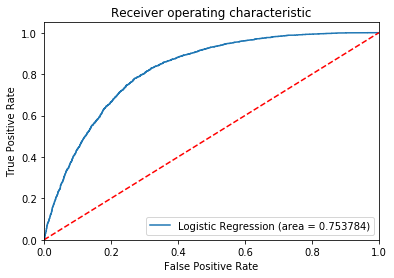

In [45]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, LogisticRegressionModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

Text(0.5,1,'Logistic Regression Classifier')

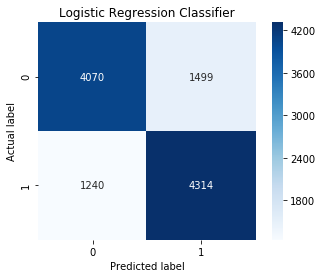

In [46]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Logistic Regression Classifier')
# plt.savefig('Confusion_matrix_LR.png')

# tpr = cm[1,1]/(cm[1,1] + cm[1,0])
# fpr = cm[0,1]/(cm[0,1] + cm[0,0])
# print('TPR: {0}'.format(tpr))
# print('FPR: {0}'.format(fpr))

In [47]:
# ####  Random Forest  ####
# model_RF = sklearn.ensemble.RandomForestClassifier(n_estimators=25, random_state=521) 
# model_RF.fit(X_train, y_train)

# y_pred = model_RF.predict(X_test)
# acc = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# print(acc)
# print(f1)

# cm = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(9,9))
# sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges');
# plt.ylabel('Actual label');
# plt.xlabel('Predicted label');
# # all_sample_title = 'Accuracy Score: {0}'.format(score)
# plt.title('Random Forest Classifier', size = 15);
# # plt.savefig('Confusion_matrix_RF.png')


# tpr = cm[1,1]/(cm[1,1] + cm[1,0])
# fpr = cm[0,1]/(cm[0,1] + cm[0,0])
# print('TPR: {0}'.format(tpr))
# print('FPR: {0}'.format(fpr))